# IMBD crawling project
## Collecting action genre's 
### title | USgross box office revenue | statscore | critic metascores | critic review texts |  
#### Dataset : [title, US box office revenue, starscore, [(metascores, metatext),(metascores, metatext),(metascores, metatext)...]]

# < 환경 세팅> 중요%%

## !!!! 커스텀 설정 !!!! 부분을 따로 커멘트에 표시해둠 => 3개정도 됨.
## 바로 밑의 모듈들을 현재 주피터 노트북 개발환경(중요)에 속하게 다운 !!주피터가 쓰는 환경으로 pip install

```bs4, urllib3, chromewebdriver, time, lxml, urllib3, csv```

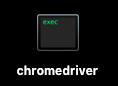

## 위에 모든 모듈을 => 주피터 놑북에서 쓰는 개발환경내에서 pip install


In [53]:
# Import modules 
import bs4
import urllib3
import selenium.webdriver as webdriver
# !!!! 커스텀 설정 !!!! 너의 크롬 드라이버 파일의 디렉토리
from time import sleep
from lxml import html
import urllib3
import csv
import os
# Get html text and let lxml parse it in its own way.
http = urllib3.PoolManager()

# 100page 씩 나누어서 => 5000개의 영화씩 => 한개의 csv파일로도 나누기.
# 적당한 선에서 나누어서 보내주기.

# #1 Store all 'action genre' movie urls to one variable

```whole_title_urls_storage```

In [54]:
# load action genre page
driver = webdriver.Chrome('/Users/sucky/Desktop/chromedriver') 
action_genre_url = "https://www.imdb.com/search/title?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=cd28805a-4e91-4f0f-b066-0db5ff4dd1a7&pf_rd_r=30AH67YYPH64GCS9CRA9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=boxoffice&ref_=chtbo_gnr_1&genres=action&explore=title_type,genres"
driver.get(action_genre_url)
driver.implicitly_wait(2)

#Save all the link at issue
#1). save all the url links of 253,049 action movies.
whole_title_urls_storage_1 = [] # 100 per 1 storage
 
#2). iterate with selenium to collect all the links

for i in range(100): # !!! 커스텀 설정 !!! : 현실적으로 데이터 갯수를 줄여야하는 경우 range() 안에 있는 게 <page수> 임
                    # 한 페이지당 영화 50개 이므로 시간 없으면 줄이기, 나는 그냥 테스트용으로 영화 500개 (10페이지만) 해봄.
                    # 액션 영화 전체 페이지는 약 5061페이지인듯함.
    try :
    #wait loading
        driver.implicitly_wait(2)
    
    #get driver's url
        now_url = driver.current_url
        r = http.request('GET', now_url)
        source = r.data
        tree = html.document_fromstring(source)
    
    # get all the href links
        one_page_url_list = ['https://www.imdb.com'+i.get('href') for i in tree.cssselect('div div div div div div div div div h3 a')]
    
    # extend this to whole title urls storage
        whole_title_urls_storage_1.extend(one_page_url_list)
    
    # click move on to next page
        if now_url == "https://www.imdb.com/search/title?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=cd28805a-4e91-4f0f-b066-0db5ff4dd1a7&pf_rd_r=30AH67YYPH64GCS9CRA9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=boxoffice&ref_=chtbo_gnr_1&genres=action&explore=title_type,genres":
            driver.find_element_by_xpath('//*[@id="main"]/div/div[4]/a').click()
        else:
            driver.find_element_by_xpath('//*[@id="main"]/div/div[4]/a[2]').click()
    
    except:
        print('error occured at {}th set'.format(i))

os.system('say "your program has been completed."')

0

# check data size : fix if there are overlaps. (같은 정보만 모이는 버그 방지)

In [56]:
len(set(whole_title_urls_storage_1)) #내가 모은 url이 중복없이 원하는 개수대로 모였는지 확인

5000

## 2. Plan Crawling

### 대체적인 코드 진행
### Open CSV, CSV WRITER
### import csv
### f = open('/Users/sucky/Desktop/outputs/test_output_#{}.csv'.format('final_7'), 'w', encoding='utf-8', newline='')
### wr = csv.writer(f)

## whole intended data = []
# Repeat the following link by link
## a_movie_data = []
## Try:
### <1>. there should be!! 'box office us-gross info including element' 
###         => if year is 2019 
###                      continue (screen recent)
###         find name and make it 'a'
###         find star score and make it 'b'
###         find box office us gross make it 'c'
### <2>.  get Download metascore link => download html => find /<~~>? part to get the clue of into review url of the allpopen review and score page. 
###       Try:
### <3>.  go into the made link get meta score & review each
###          list_of_metascores = []
###          corresponding_reviews = [] 
###          해당 사이트 점수와 리뷰 모두 위의 리스트에 수집
###          for k in range(len(list_of_metascores)):
###          wr.writerow([a, b, c, list_of_metascores[k], corresponding_reviews[k]])
###       except:
###
###          링크가 존재하지 않거나, 리뷰데이터가 없는 경우 바로 다음 루프로 continue
## except:
##       continue
## f.close()



# 3. Crawl !! 

# 아웃풋 창에 => 몇번째 영화까지 진행되는 지 나오니 보면서 .csv파일 잘 써지고 있는지 확인 !
# 에러가 중간 중간 있지만, 데이터량이 충분히 많아서 무시해도 될듯함

In [ ]:
# Open .csv file
f = open('imbd_test_1.csv', 'w') # !!!! 커스텀 설정 !!!! : 원하는 '디렉터리/파일명.csv'을 첫번째 인풋에.
wr = csv.writer(f)

# count(url's index)
iter = -1

# Iterate over collected links
for l in whole_title_urls_storage_1:
    
    # counter
    iter += 1
    print(iter)
    
    # repeat this
    try:
       
        # <Get html and parsed tree>
            # get html of the link
        r = http.request('GET', l) # l is one link from loop
        source = r.data
        
            # parse them into lxml tree
        tree = html.document_fromstring(source) 
        
        # <Filtering out, non-existent url, years > 2018, non-movie)  
        
            # 1). non-movie filter!
        if 'Gross USA:' not in source:
            continue
            
            # 2). No year element, year bigger than 2018 filter!
        year_elem = tree.cssselect('div div div div div h1 span#titleYear')
        
        if len(year_elem) == 0 :
            continue
        
        if int([k for k in [i.text_content() for i in year_elem]][0].strip('()')) > 2018:
            continue
            
        # <Get infoS>
            # find a movie name => 'title'
        title_str = [i.text_content().encode('utf-8') for i in tree.cssselect('div div div div div h1')][0]
        title = title_str.split('\xc2')[0]
            # find a movie star score => 'score'
        score = float([i.text_content() for i in tree.cssselect('div div div div div div strong span')][0])
            # find a us_gross_box_office_revenue => 'us_gross'
        gross_str = [i.text_content() for i in tree.cssselect('#main_bottom div#titleDetails.article')][0].encode('utf-8')
        us_gross = int([i for i in gross_str.split('\n') if i.startswith('Gross USA:')][0].split('$')[-1].replace(',',''))
        
        # Get metalink
        # Get html of the metalink
        # find /~~? part to to use as a key into review page.
        # integrate the found ~~ part with 
        # f'https://www.metacritic.com/movie/{john-wick}/critic-reviews' and get that url html
        # case : 1. data exist : crawl
        
        # find the piece
        first_piece = [link[2] for link in tree.cssselect('div div div div.titleReviewBarSubItem div a')[0].iterlinks()][0]
        
        # make 2nd url of l (now link)
        new_list = l.split('/')[:-1]
        new_list.append(first_piece)
        second_url = '/'.join(new_list)
        
        # get html of 2nd url
        r = http.request('GET', second_url)
        source = r.data
        # and parse it
        tree = html.document_fromstring(source)
        # get /~? => matacritic's title from it.
        clue_string = [i for i in tree.cssselect('div div.see-more')[0].iterlinks()][0][2].split('?')[0].split('/')[-1]
        # get 3rd url out of clue string
        all_review_url = 'https://www.metacritic.com/movie/{}/critic-reviews'.format(clue_string)
        
        #<in the all_review_url> - make a list of scores and a list of texts.
        #    get html of all_review_url
        r = http.request('GET', all_review_url)
        source = r.data
        tree = html.document_fromstring(source)
        
        #     get a list of critic scores
        lists_of_each_text_list = []
        list_of_critic_scores = []

        for i in tree.cssselect('div.left.fl'):
            lists_of_each_text_list.append(i.text_content())

        for k in range(len(lists_of_each_text_list)):
            list_of_critic_scores.append(int(lists_of_each_text_list[k].split('\n')[4]))
        #<list_of_critic_scores> completed!!
        
        #     get a list of critic texts
        a_movie_critic_texts_list = []
        for j in tree.cssselect('div div div div div div div div a.no_hover'):
            a_critic_text = j.text_content().strip().encode('utf-8')
            a_movie_critic_texts_list.append(a_critic_text)
    
        #<a_movie_critic_texts_list> completed
        
        #write line by line into csv file
        
        for c in range(len(list_of_critic_scores)):
            wr.writerow([title, score, us_gross,list_of_critic_scores[c],a_movie_critic_texts_list[c]])
            
            
    except Exception as e:
        print("error occurted at {}".format(iter)) # ignore if there are already so many data.
        continue
        
# Close csv.file
f.close()

# Tell me
os.system('say "your program has been completed."')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
error occurted at 18
19
20
21
22
23
24
25
26
27
28
29
30
error occurted at 30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
error occurted at 49
50
51
52
53
54
55
error occurted at 55
56
57
58
59
error occurted at 59
60
61
error occurted at 61
62
63
64
65
66
error occurted at 66
67
error occurted at 67
68
69
70
71
72
error occurted at 72
73
74
75
76
77
78
79
80
81
82
error occurted at 82
83
error occurted at 83
84
85
86
87
88
89
90
91
92
error occurted at 92
93
94
error occurted at 94
95
96
97
98
error occurted at 98
99
100
101
error occurted at 101
102
error occurted at 102
103
104
error occurted at 104
105
106
107
error occurted at 107
108
109
110
111
112
113
114
115
116
117
error occurted at 117
118
119
120
error occurted at 120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
error occurted at 136
137
138
139
140
141
142
143
144
145
146
147
error occurted at 147
148
error occurted at 148
149
150
151
152
153
15

662
error occurted at 662
663
664
error occurted at 664
665
error occurted at 665
666
667
668
error occurted at 668
669
670
671
672
error occurted at 672
673
error occurted at 673
674
error occurted at 674
675
error occurted at 675
676
error occurted at 676
677
error occurted at 677
678
error occurted at 678
679
error occurted at 679
680
error occurted at 680
681
682
683
error occurted at 683
684
685
error occurted at 685
686
687
error occurted at 687
688
error occurted at 688
689
error occurted at 689
690
691
error occurted at 691
692
693
694
695
696
error occurted at 696
697
error occurted at 697
698
error occurted at 698
699
error occurted at 699
700
error occurted at 700
701
error occurted at 701
702
error occurted at 702
703
error occurted at 703
704
705
error occurted at 705
706
error occurted at 706
707
error occurted at 707
708
error occurted at 708
709
710
711
error occurted at 711
712
error occurted at 712
713
714
715
716
error occurted at 716
717
error occurted at 717
718
71

# 연습장

In [51]:
r = http.request('GET', 'https://www.imdb.com/title/tt3385516/?ref_=adv_li_tt')
source = r.data
tree = html.document_fromstring(source)
#year_elem = tree.cssselect('div div div div div h1 span#titleYear')
#[k for k in [i.text_content() for i in year_elem]][0].strip('()')
#title_str = [i.text_content().encode('utf-8') for i in tree.cssselect('div div div div div h1')][0]
#title_str.split('\xc2')[0]
#float([i.text_content() for i in tree.cssselect('div div div div div div strong span')][0])
#gross_str = [i.text_content() for i in tree.cssselect('#main_bottom div#titleDetails.article')][0].encode('utf-8')
#int([i for i in gross_str.split('\n') if i.startswith('Gross USA:')][0].split('$')[-1].replace(',',''))
first_piece = [link[2] for link in tree.cssselect('div div div div.titleReviewBarSubItem div a')[0].iterlinks()][0]
new_list = 'https://www.imdb.com/title/tt3385516/?ref_=adv_li_tt'.split('/')[:-1]
new_list.append(first_piece)
second_link = '/'.join(new_list)

r = http.request('GET', second_link)
source = r.data
tree = html.document_fromstring(source)
# find clue there
clue_string = [i for i in tree.cssselect('div div.see-more')[0].iterlinks()][0][2].split('?')[0].split('/')[-1]
all_review_url = "https://www.metacritic.com/movie/{}/critic-reviews".format(clue_string)

# get html of all_review_url
r = http.request('GET', all_review_url)
source = r.data
tree = html.document_fromstring(source)

# get a list of critic scores and texts
lists_of_each_text_list = []
list_of_critic_scores = []

for i in tree.cssselect('div.left.fl'):
    lists_of_each_text_list.append(i.text_content())

for k in range(len(lists_of_each_text_list)):
    list_of_critic_scores.append(int(lists_of_each_text_list[k].split('\n')[4]))

print(len(list_of_critic_scores))

# get a list of critic texts
a_movie_critic_texts_list = []
for j in tree.cssselect('div div div div div div div div a.no_hover'):
    a_critic_text = j.text_content().strip().encode('utf-8')
    a_movie_critic_texts_list.append(a_critic_text)
    
print(len(a_movie_critic_texts_list))
    


48
48


In [154]:
f = open('/Users/sucky/Desktop/test.csv', 'w')
wr = csv.writer(f)

string = tree.cssselect('div div div div div div div div a.no_hover')[0].text_content().strip()

wr.writerow([1,string.encode('utf-8')])
wr.writerow([2,string.encode('utf-8')])

# Close CSV file.
f.close()